In [9]:
import jcamp
from os import listdir,path
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt

(micromol/mol)-1m-1 (base 10)
Extracting CSV for Acetone. Total extracted: 1


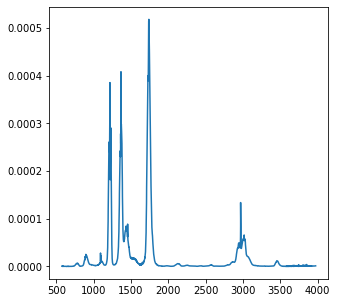


transmittance
Extracting CSV for Benzene. Total extracted: 2


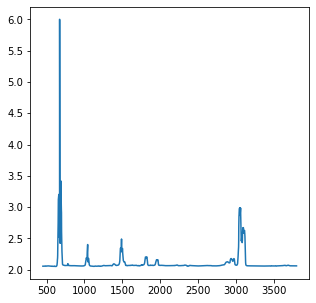


transmittance
Extracting CSV for Chloromethane. Total extracted: 3


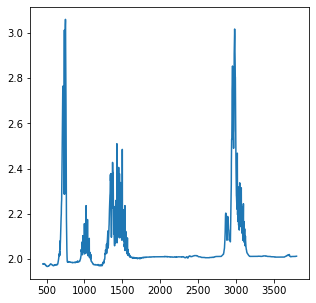


transmittance
Extracting CSV for Ethene. Total extracted: 4


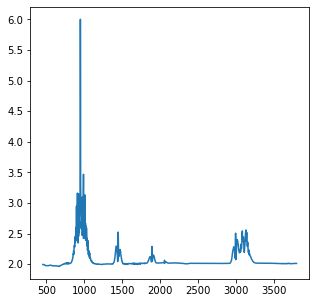


transmittance
Extracting CSV for Ethyne. Total extracted: 5


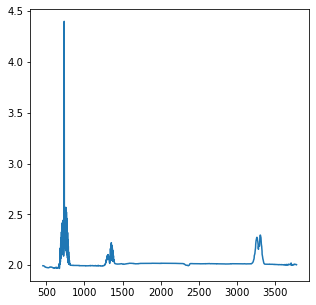


transmittance
Extracting CSV for Formaldehyde. Total extracted: 6


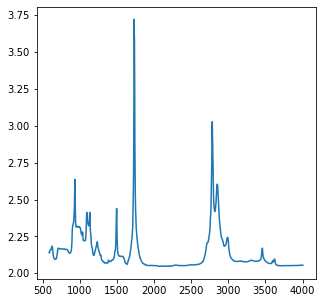


absorbance
Extracting CSV for Formic acid. Total extracted: 7


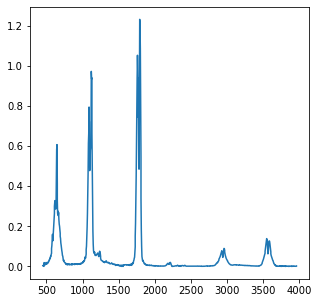


absorbance
Extracting CSV for Methane. Total extracted: 8


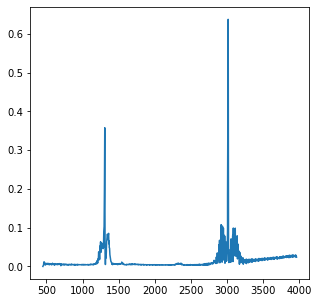


(micromol/mol)-1m-1 (base 10)
Extracting CSV for Methanol. Total extracted: 9


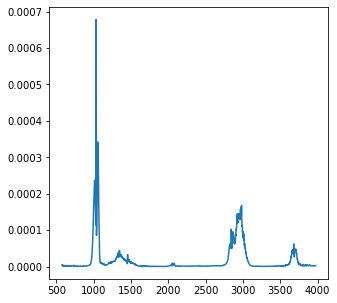


absorbance
Extracting CSV for Methoxymethane. Total extracted: 10


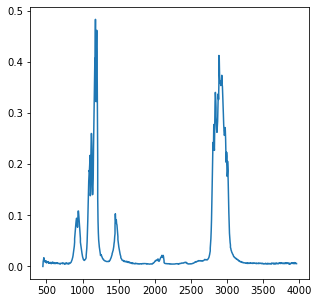


absorbance
Extracting CSV for Methyl Formate. Total extracted: 11


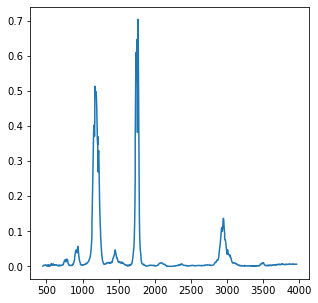


absorbance
Extracting CSV for Methylamine. Total extracted: 12


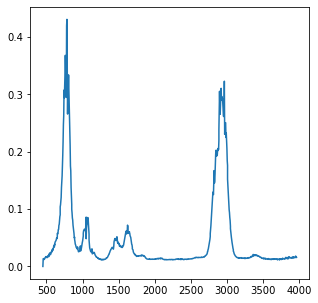


absorbance
Extracting CSV for Nitromethane. Total extracted: 13


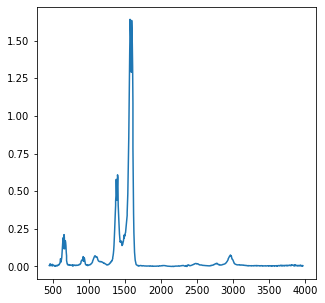

In [27]:
path = r'C:\Users\Karthik\Desktop\Spectra Identification\Basis Spectra
all_files=listdir(path)
num_extracted=0
for file in all_files:
    data=jcamp.JCAMP_reader(path.join(path,file))
    wavenumbers = data.get('x_units', r'N\A').lower()!= 'micrometers'
    absorbance = data.get('yunits', r'N\A').lower()== 'absorbance'
    print(data.get('yunits', r'N\A').lower())
    dummy=file.split('.')
    name=dummy[0]
    if wavenumbers==False:
        lambda_X=10000/data['x']
    else:
        lambda_X=data['x']
    if data.get('yunits', r'N\A').lower()== 'reflectance':
        print('Reflectance data found')
        continue
    if data['x'].shape!=data['y'].shape:
        print('Shape mismatch')
        continue
    if (absorbance==False) &(data.get('yunits', r'N\A').lower()!= 'reflectance') & (data.get('yunits', r'N\A').lower()!='(micromol/mol)-1m-1 (base 10)'):
        Y=data['y']
        Y[Y<=0]=1e-04
        abs_Y=2-log10(data['y']*100)
    else:
        abs_Y=data['y']
    num_extracted+=1
    print('Extracting CSV for {}. Total extracted: {}'.format(name,num_extracted))
    newfile=path.join(r'C:\Users\Karthik\Desktop\Spectra Identification\Basis CSV',name+'.csv')
    dict={'x':lambda_X,'y':abs_Y}
    df=pd.DataFrame(dict)
    df.to_csv(newfile)
    
    